Install profiling
https://github.com/ydataai/ydata-profiling

In [2]:
# pip install ydata-profiling
# pip install --upgrade typing-extensions



To initiate a session restart, go to Runtime > Restart Session. Occasionally, the impact of installed libraries may not be visible until a restart is performed.

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

/var/folders/9f/d0blkdy107j9w989n_kd85l40000gn/T/ipykernel_54114/70341127.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Transfer: Moving Data from Google Drive to the Current Directory ( 5 pt)
In this section, we will transfer data from Google Drive to the current working directory and Unzip it. Let's assume that the data is located in "/content/drive/MyDrive/HW2/HW2_Data.zip".

In [4]:
# from google import drive
# drive.mount('/content/drive')

In [5]:
################################################################################
## TODO: Use Linux command to transfer and unzip data
################################################################################
# zip file location should be :  "/content/drive/MyDrive/HW2/HW2_Data.zip"
# destination directory for unzipping should be  =>  "/content/"
!unzip "/content/drive/MyDrive/HW2/HW2_Data.zip" -d "/content/"




unzip:  cannot find or open /content/drive/MyDrive/HW2/HW2_Data.zip, /content/drive/MyDrive/HW2/HW2_Data.zip.zip or /content/drive/MyDrive/HW2/HW2_Data.zip.ZIP.


## Load Data ( 5 pt)
load data in pandas dataframe

In [6]:
################################################################################
## TODO: load and display dataframe
################################################################################
data = pd.read_csv('./HW2_Data/Heart_Disease_Dataset.csv')
df = pd.DataFrame(data)
df.head()



,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Explore data by ProfileReport ( 5 pt)
https://github.com/ydataai/ydata-profiling

Just simply run ProfileReport in 2 lines

In [7]:
################################################################################
## TODO: Use profiler in 2 line and explore the data
################################################################################
profile = ProfileReport(df, title='Heart Risk Dataset Profile')
profile.to_widgets()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Explore data by Panda ( 5pt )

shape of dataset is:  (1190, 12)
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
this dataset has no missing entries.
Positive Cases:  629
Negative Cases:  561
--------------------- Plots --------------------------


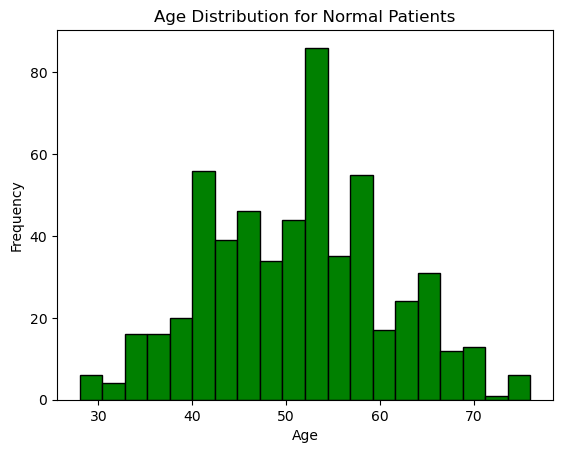

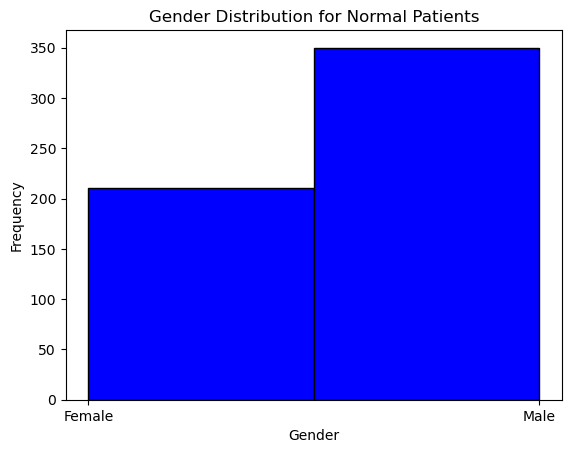

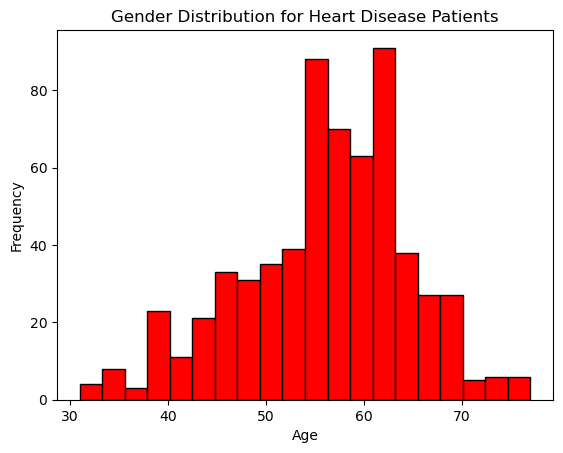

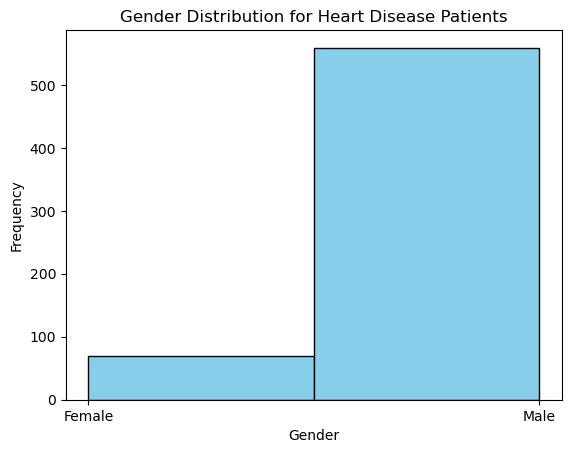

In [8]:
#############################################################################
## TODO: Find the shape of the dataset.
#############################################################################
shape = df.shape
print("shape of dataset is: ", shape)

#############################################################################
## TODO: Check if there are missing entries in the dataset columnwise.
#############################################################################
missing_entries = df.isnull().sum()
print(missing_entries)
if missing_entries.sum() == 0:
    print("this dataset has no missing entries.")
else:
    print("this dataset has", missing_entries.sum(), " missing entries.")

#############################################################################
## TODO: Check number of positive and negative cases
#############################################################################
positive_cases = df[df['target'] == 1].shape[0]
negative_cases = df[df['target'] == 0].shape[0] 
print("Positive Cases: ", positive_cases)
print("Negative Cases: ", negative_cases)

#############################################################################
## TODO: plot  age distribution and gender distribution for both normal
## and heart disease patients. (2*2 plots)
#############################################################################
print("--------------------- Plots --------------------------")

# first for normal (negative) patients
normal_patients = df[df['target'] == 0]
# now lets do the distribution for the age
plt.hist(normal_patients['age'], bins=20, color='g', edgecolor='k')
plt.title('Age Distribution for Normal Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# gender distribution 
plt.hist(normal_patients['sex'], bins=2, color='b', edgecolor='k')
plt.xticks(np.arange(0,2,1), labels=['Female', 'Male'])
plt.title('Gender Distribution for Normal Patients')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

# now for the heart disease patients
hd_patients = df[df['target'] == 1]
# distribution for age
plt.hist(hd_patients['age'], bins=20, color='r', edgecolor='k')
plt.title('Gender Distribution for Heart Disease Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# gender distribution 
plt.hist(hd_patients['sex'], bins=2, color='skyblue', edgecolor='k')
plt.xticks(np.arange(0,2,1), labels=['Female', 'Male'])
plt.title('Gender Distribution for Heart Disease Patients')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


## Split Data ( 2 pt )
Before any action you should do this step to prevent from leak of data and using test data in your tunning pipeline

In [9]:
from sklearn.model_selection import train_test_split
#############################################################################
## TODO: split dataframe into 4 dataframe X_train, X_test, y_train, y_test
## test(30%) train(70%)
# Assuming df is your DataFrame and 'target_column' is your target variable
# Split the data into training and testing sets with 0.7 to 0.3 ratio
#############################################################################
X_train, X_test, y_train, y_test = train_test_split(df, df['target'], test_size=0.3)

## Feature Engineering:( 8 pt)
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.

In [10]:
from sklearn.preprocessing import StandardScaler
#############################################################################
## TODO: Normalize numerical features
## Note that just numerical fetures should be normalized.
## Type of features is determined in dataset description file.
# Create a StandardScaler instance
# Fit to numerical columns of train and transform test and train based on this
## Warning:
## You can't fit your Scaler on whole data. Fit should be just on Train data.
# Print the first few rows to check the result
#############################################################################

# our dataset contains numerical and nominal data. Thus we need to grab the features that are strictly numerical.
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate','oldpeak'] 
scalar = StandardScaler()
X_train[numerical_cols] = scalar.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scalar.transform(X_test[numerical_cols])
X_train.head()


#############################################################################
## TODO: just comment name of 2 other scaler form sklearn and write one paragraph for each:
## Your Comment:
# 1. MinMaxScaler:
# This scaler transforms features by scaling to a specific range. Essentially, each feature gets
# transformed so that it ends up between a specific min and max of a range (usually 0 and 1). This approach is verys straightforward,
# and beneficial for algorithms that are sensitive to the scale of data
# 2. RobustScaler:
# This scaler helps improve the datasets so that they are more robust to outliers. It uses the median and interquartile range to basically ignore
# data that is outside the typical range of data. It still preserves the distribution of data instead of compressing the range of the data. Best  
# used for datasets with a normal distribution. 
##################################################################################


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
459,0.752667,1,4,0.081348,-2.077685,1,1,-2.137122,0,0.514985,2,1
6,-0.947884,0,2,-0.142476,0.248197,0,0,1.239079,0,-0.835433,1,0
785,-0.947884,0,4,0.305172,0.238384,0,2,0.515607,1,-0.655377,2,0
342,1.071520,1,4,-1.261597,-2.077685,1,0,-1.011722,1,0.334930,3,1
699,0.433814,1,4,0.976645,0.572054,0,2,-1.132300,1,-0.115210,1,1


### plot correlations ( 2 pt)

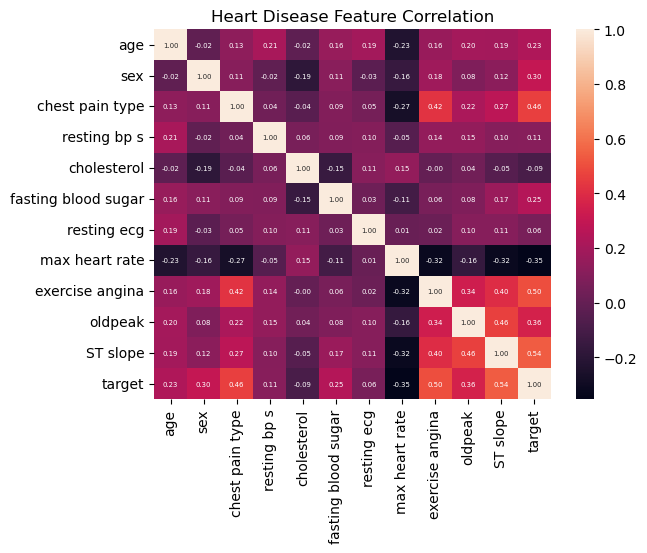

In [11]:
#############################################################################
## TODO: Make a temp dataframe with X_train and y_train.
## plot correlation between all features
#############################################################################
temp_df = X_train.copy()
temp_df['target'] = y_train.values
corr = temp_df.corr("kendall")
sns.heatmap(corr, annot=True, annot_kws={"size":5}, fmt=".2f")
plt.title('Heart Disease Feature Correlation')
plt.show()




## Define a classification report function ( 3 pt)


In [12]:
#############################################################################
## TODO: Complete this function by considering function description
## Note: write every thing from scatch with python or numpy operators
#############################################################################

def classification_report(y_true, y_pred):
    """
    Calculate classification metrics based on true and predicted labels.

    Parameters:
    - y_true: Array of true labels (0 or 1).
    - y_pred: Array of predicted labels (0 or 1).

    Returns:
    - Accuracy: Ratio of correct predictions to total samples.
    - Precision: Accuracy of positive predictions among all predicted positives.
    - Recall: Ability to capture actual positives among all actual positives.
    - F1 Score: Harmonic mean of precision and recall, balancing both metrics.
    - FNR: Proportion of actual positives incorrectly predicted as negatives.
    """

################### Complete this part###############################
    

    correct_pred = 0
    positive_pred = 0
    positive_pred_match = 0
    actual_positive = 0
    false_negatives = 0
    
    # we will do all checks within the same loop for space optimization
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct_pred += 1
            if y_true[i] == 1 and y_pred[i] == 1:
                positive_pred_match += 1
        if y_pred[i] == 1:
            positive_pred += 1
        if y_true[i] == 1:
            actual_positive += 1
        if y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1
    
    Accuracy = correct_pred / len(y_true)
    Precision = positive_pred_match / positive_pred
    Recall = positive_pred_match / actual_positive

    # since everything needs to be programmed raw, the formula for F1 score is:
    # F1 = (2 * precision * recall) / (precision + recall)
    F1score = (2 * Precision * Recall)/(Precision + Recall)

    # FNR is examining false negatives. Here, we divide false negatives by total positives
    FNR = false_negatives / actual_positive

####################################################################


    result = {
        'Accuracy:' : Accuracy,
        'Precision:' : Precision,
        'Recall:' : Recall,
        'F1score:': F1score,
        'FNR:': FNR

    }

    return result


# Test function





# Test Case 1: Perfect predictions
y_true_1 = [1, 0, 1, 0]
y_pred_1 = [1, 0, 1, 0]
result_1 = classification_report(y_true_1, y_pred_1)
print(result_1)


# Test Case 2: Imperfect predictions
y_true_2 = [1, 0, 1, 0]
y_pred_2 = [0, 1, 1, 1]

result_2 = classification_report(y_true_2, y_pred_2)
print(result_2)





{'Accuracy:': 1.0, 'Precision:': 1.0, 'Recall:': 1.0, 'F1score:': 1.0, 'FNR:': 0.0}
{'Accuracy:': 0.25, 'Precision:': 0.3333333333333333, 'Recall:': 0.5, 'F1score:': 0.4, 'FNR:': 0.5}


## Model Traning

### Covert data to numpy ( 2 pt)

In [13]:
#############################################################################
## TODO: convert X_train, X_test, y_train, y_test to numpy array
#############################################################################

X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

### Train Logistic Regression ( 5pt)

{'Accuracy:': 1.0, 'Precision:': 1.0, 'Recall:': 1.0, 'F1score:': 1.0, 'FNR:': 0.0}


Text(50.722222222222214, 0.5, 'Actual')

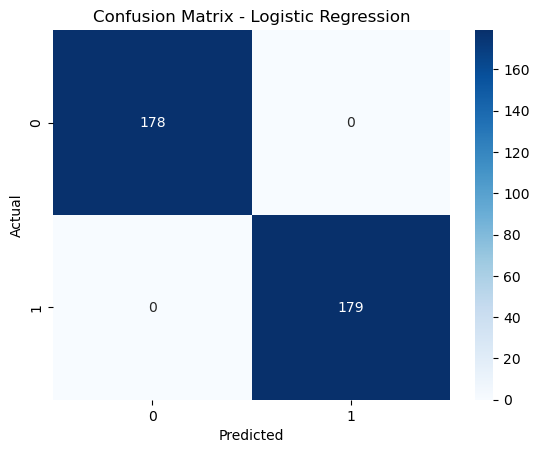

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#############################################################################
## TODO: Train a Logistic Regression Model and test your model.
## give a test report from test result by above classification_report function
## Plot the confusion matrix using seaborn
#############################################################################
log_reg = LogisticRegression()
log_reg.fit(X_train_np, y_train_np)
y_pred_lr = log_reg.predict(X_test_np)

# now the classification_report
lr_result = classification_report(y_test_np, y_pred_lr)
print(lr_result)

# the confusion matrix
lr_conf = confusion_matrix(y_test_np, y_pred_lr)
sns.heatmap(lr_conf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')


### Train KNN ( 5pt)

{'Accuracy:': 0.927170868347339, 'Precision:': 0.9090909090909091, 'Recall:': 0.9497206703910615, 'F1score:': 0.9289617486338797, 'FNR:': 0.05027932960893855}


Text(50.722222222222214, 0.5, 'Actual')

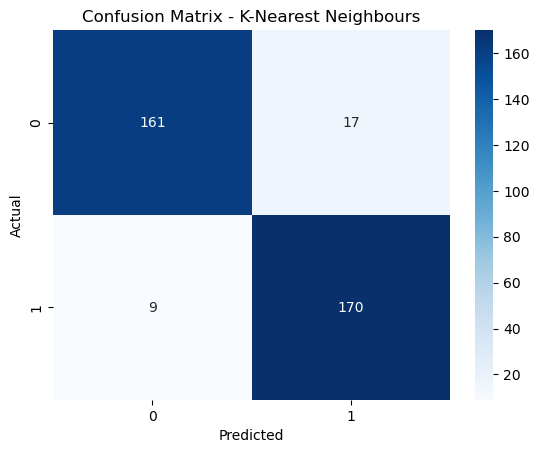

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#############################################################################
## TODO: Train a KNN Model and test your model.
## give a test report from test result by above classification_report function
## plot confusion matrix
#############################################################################
knn = KNeighborsClassifier()
knn.fit(X_train_np, y_train_np)
y_pred_knn = knn.predict(X_test_np)

print(classification_report(y_test_np, y_pred_knn))

knn_conf = confusion_matrix(y_test_np, y_pred_knn)
sns.heatmap(knn_conf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-Nearest Neighbours')
plt.xlabel('Predicted')
plt.ylabel('Actual')



### Train a safer model ( 3pt)

To make sure our model doesn't make dangerous mistakes, like saying a high-risk patient is healthy, we can use the class_weight option in LogisticRegression(). If the model wrongly thinks a healthy person is high-risk, it's not as big of a problem and doctors will check it!

{'Accuracy:': 1.0, 'Precision:': 1.0, 'Recall:': 1.0, 'F1score:': 1.0, 'FNR:': 0.0}


Text(50.722222222222214, 0.5, 'Actual')

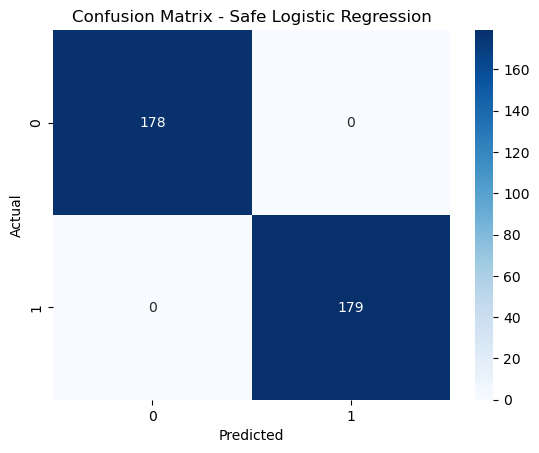

In [16]:
#############################################################################
## TODO: create a safer model with class_weight use your owen weight result is not important
## plot confusion matrix
#############################################################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve
weighted_model = LogisticRegression(class_weight='balanced')
weighted_model.fit(X_train_np, y_train_np)
y_pred_safe = weighted_model.predict(X_test_np)

print(classification_report(y_test_np, y_pred_safe))

safe_conf = confusion_matrix(y_test_np, y_pred_safe)
sns.heatmap(safe_conf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Safe Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')







### Cross Validation Score ( 5pt)

In [17]:
from sklearn.model_selection import cross_validate
#############################################################################
## TODO: research  about "K-Fold cross validation"
## cross validate your KNN model to evaluate your model better
## use accuracy and recall to report cross validation results
#############################################################################

scoring = ['accuracy', 'recall_macro']

cv_res = cross_validate(knn, X_test_np, y_pred_knn, cv=5, scoring=scoring)

print("KNN Acc: ", cv_res['test_accuracy'].mean())
print("KNN Recall: ", cv_res['test_recall_macro'].mean())





KNN Acc:  0.9299687010954617
KNN Recall:  0.9300225922516944


### Hyperparameter Tuning Using GridSearchCV ( 5pt)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#############################################################################
## TODO: Explore GridSearchCV functionality to identify the best parameters
## (n_neighbors, weights, p) for your KNN model.
#############################################################################
# for our n_neighbours value, we should start with sqrt(n)
import math


param_grid = {
    'n_neighbors' : range(int(math.sqrt(len(X_train_np)) - 5), int(math.sqrt(len(X_train_np)) + 5)),
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_np, y_train_np)





GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(23, 33), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [19]:
#############################################################################
## TODO: Retrieve the best model and its parameters
#############################################################################
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters:  {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}


### Cross Validation Score on Result of Grid Search ( 2pt)

In [20]:
#############################################################################
## TODO: Do again "K-Fold cross validation" on best KNN model of the Gride Search
#############################################################################
scoring_best = ['accuracy', 'recall_macro']
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
cv_res_best = cross_validate(knn, X_test_np, y_pred_best, cv=5, scoring=scoring_best)

print("KNN Acc: ", cv_res_best['test_accuracy'].mean())
print("KNN Recall: ", cv_res_best['test_recall_macro'].mean())


KNN Acc:  0.9189358372456964
KNN Recall:  0.9186907916319681


### Is the aforementioned KNN model (Best KNN) fair? ( 3 pt)
Evaluate that model perform equally on men and women or not.

In [21]:
#############################################################################
## TODO: split your test data on two split of women and men and give
## classification_report on them.
#############################################################################
X_test_male = X_test[X_test['sex'] == 1]
X_test_female = X_test[X_test['sex'] == 0]

y_test_male = y_test.loc[X_test_male.index]
y_test_female = y_test.loc[X_test_female.index]

y_test_male_np = np.array(y_test_male)
y_test_female_np = np.array(y_test_female)

best_model.fit(X_train, y_train)

y_pred_male = best_model.predict(X_test_male)
print("Male Report: ", classification_report(y_test_male_np, y_pred_male))

y_pred_female = best_model.predict(X_test_female)
print("Female Report: ", classification_report(y_test_female_np, y_pred_female))

#############################################################################
## TODO: write a comment and explain the result of this section in one paragraph.
## Why FNR in this dataset is important? And probably why this gap between men
## and women FNR happens
# Your Comment:
# The FNR is important because it shows the likelihood that the model is able to correctly train on male vs female data. This gap may occur because 
# of the gap in data collected (i.e., there is more male data available, hence the FNR is lower for men than women)
#
#
#
#
#
#
#
#
#############################################################################

Male Report:  {'Accuracy:': 0.9742647058823529, 'Precision:': 0.9696969696969697, 'Recall:': 0.9876543209876543, 'F1score:': 0.9785932721712538, 'FNR:': 0.012345679012345678}
Female Report:  {'Accuracy:': 0.9411764705882353, 'Precision:': 0.8333333333333334, 'Recall:': 0.8823529411764706, 'F1score:': 0.8571428571428571, 'FNR:': 0.11764705882352941}


### Ensemble Leanrning ( 10 pt)

First read the first part of this blog
https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

In [22]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingCVClassifier
from sklearn import metrics


#############################################################################
## TO-DO: Implement a Stacking Classifier Ensemble for Model Selection
## 1. Utilize a Logistic Regression, the best K-Neighbors Classifier,
##    Support Vector Machine (SVM), Soft-margin SVM, Decision Tree,
##    Random Forest, and Naive Bayes as base classifiers.
## 2. Designate a Logistic Regression as the Meta-Classifier.
## 3. Utilize 3-fold cross-validation for model evaluation.
## 4. Assess models' performance on the test set.
#############################################################################

# Logistic Regression Implementation
log_reg_stack = LogisticRegression()
log_reg_stack.fit(X_train_np, y_train_np)
regr_prediction = log_reg_stack.predict(X_test_np)

# Best KN Classifier Implementation
best_model_stack = grid_search.best_estimator_
best_model_stack.fit(X_train_np, y_train_np)
best_knn_prediction = best_model_stack.predict(X_test_np)

# Hard-Margin SVM (default SVM implementation)
svm_stack = SVC(kernel="linear", C=1e9)
svm_stack.fit(X_train, y_train)
svm_hard_prediction = svm_stack.predict(X_test)

# Soft-Margin SVM (change C value to something very small)
svm_soft_stack = SVC(kernel="linear", C=0.01) 
svm_soft_stack.fit(X_train, y_train)
soft_svm_prediction = svm_soft_stack.predict(X_test)

# Decision Tree Implementation. Will use the Gini Impurity 
d_tree_stack = DecisionTreeClassifier(criterion="gini")
d_tree_stack.fit(X_train, y_train)
DT_prediction = d_tree_stack.predict(X_test)

# Random Forest Implentation
rf_stack = RandomForestClassifier()
rf_stack.fit(X_train, y_train)
rf_prediction = rf_stack.predict(X_test)

# Naïve Bayes Implementation
nb_stack = GaussianNB()
nb_stack.fit(X_train, y_train)
nb_prediction = nb_stack.predict(X_test)

stacking_classifier = StackingCVClassifier(classifiers=[log_reg_stack, best_model_stack, svm_stack,
                                                        svm_soft_stack, d_tree_stack, rf_stack, nb_stack], 
                                                        meta_classifier=LogisticRegression(), cv = 3)

stacking_classifier.fit(X_train, y_train)
stack_prediction = stacking_classifier.predict(X_test)

print(classification_report(y_test_np, stack_prediction))

# performance should be solid! Check AUC ROC

 





{'Accuracy:': 1.0, 'Precision:': 1.0, 'Recall:': 1.0, 'F1score:': 1.0, 'FNR:': 0.0}


### ROC ( 10 pt)
read about AUC ROC form this link:
https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
and plot ROC Curve for ensembel model.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'AUC ROC for a Stacking Classifier')

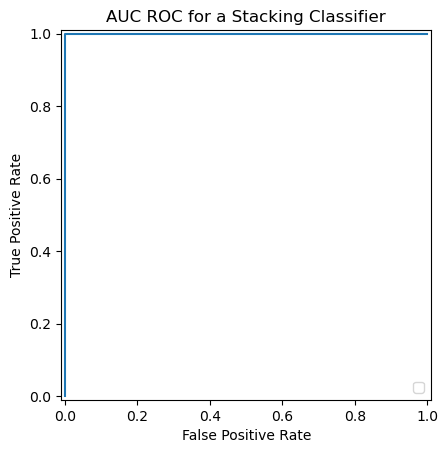

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

#############################################################################
## TODO: plot roc_curve for Ensemble model you created previously
#############################################################################

false_positive, true_positive, thresholds = roc_curve(y_test, stack_prediction)
roc_display = RocCurveDisplay(fpr=false_positive, tpr=true_positive)
roc_display.plot()

plt.title('AUC ROC for a Stacking Classifier')

#############################################################################
## TODO: what this plot can show us that other metrics like Accuracy can't:
## Your Comment:
# Helps us analyse performance across all metrics: i.e., balance between sensitivity and specificity, 
# model performance in imbalanced datasets
# aggregated measure of performance across the different classes, and comparison between models
#
#
#############################################################################